#Logistic Regression Performed on a Stroke Outcomes Dataset
##LSUS, Fall 2022
##by Marvin Battley and Libby Blair

###Imports

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #to plot charts
import seaborn as sns #used for data visualization
import warnings #avoid warning flash
warnings.filterwarnings('ignore')

###Reading the stroke dataset file

In [2]:
df=pd.read_csv("stroke.csv")

###Previewing the data

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


###Looking at the shape (rows and columns) of the data

In [4]:
df.shape

(5110, 12)

###Examining the attribute names and columns

In [5]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [7]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


####Dropping duplicate rows

In [8]:
df.drop_duplicates()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


###Checking for null values

In [9]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

###Dropping null values

In [10]:
df = df.dropna()

In [11]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [12]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


###Checking for 0s in the columns with numerical values

In [13]:
#checking for 0 values in 3 columns
print(df[df['age']==0].shape[0])
print(df[df['avg_glucose_level']==0].shape[0])
print(df[df['bmi']==0].shape[0])

0
0
0


###Droping the 'id' column since it doesn't contribute to the data analysis

In [14]:
df.drop(['id'], axis=1, inplace=True)

###Examining the label values (0 = non-stroke; 1 = stroke)

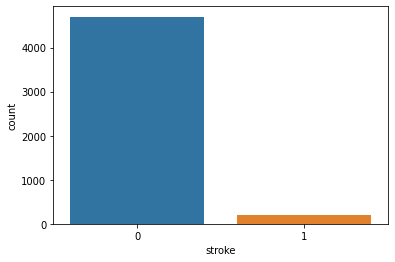

In [15]:
sns.countplot('stroke', data=df)

In [16]:
print('0 values: ', df['stroke'].value_counts()[0])
print('1 values: ', df['stroke'].value_counts()[1])

0 values:  4700
1 values:  209


###Isolating the 0 values, taking a random sample of roughly 95% of those values, and dropping them.

In [17]:
df_zeros = df.loc[df['stroke'] == 0]

In [18]:
df_drop = df_zeros.sample(frac=0.9555319149, random_state=100)
df.drop(df_drop.index, inplace=True)

###Looking at the shape of the remaining data after dropping 0s

In [19]:
df.shape

(418, 11)

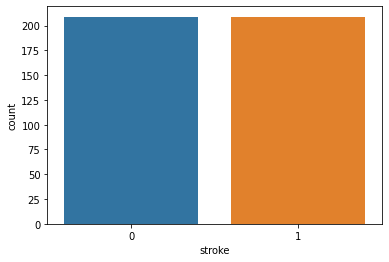

In [20]:
sns.countplot('stroke', data=df)

In [21]:
print('0 values: ', df['stroke'].value_counts()[0])
print('1 values: ', df['stroke'].value_counts()[1])

0 values:  209
1 values:  209


###Converting the categorical data to numerical data for the selected attributes.

In [22]:
df = pd.get_dummies(df, columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'], drop_first = True)

###Looking at the resulting dataframe. We observe that the labels in the 'stroke' column are no longer at the end of the dataset because all the dummy variables have been moved to the right of the dataset.

In [23]:
df

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,1,1,0,1,0,0,1,1,0,0
2,80.0,0,1,105.92,32.5,1,1,1,0,1,0,0,0,0,1,0
3,49.0,0,0,171.23,34.4,1,0,1,0,1,0,0,1,0,0,1
4,79.0,1,0,174.12,24.0,1,0,1,0,0,1,0,0,0,1,0
5,81.0,0,0,186.21,29.0,1,1,1,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4951,23.0,0,0,132.88,24.9,0,0,0,0,1,0,0,1,0,1,0
4973,65.0,0,0,81.06,30.1,0,1,1,0,1,0,0,1,0,0,1
4996,40.0,0,0,93.97,23.6,0,0,1,0,1,0,0,1,0,1,0
4999,18.0,0,0,83.37,24.4,0,1,0,0,1,0,0,0,0,0,0


###Moving 'stroke' column back to the end (far right) of the dataset

In [24]:
df = df[[c for c in df if c not in ['stroke']] 
       + ['stroke']]

###Visualizing the data

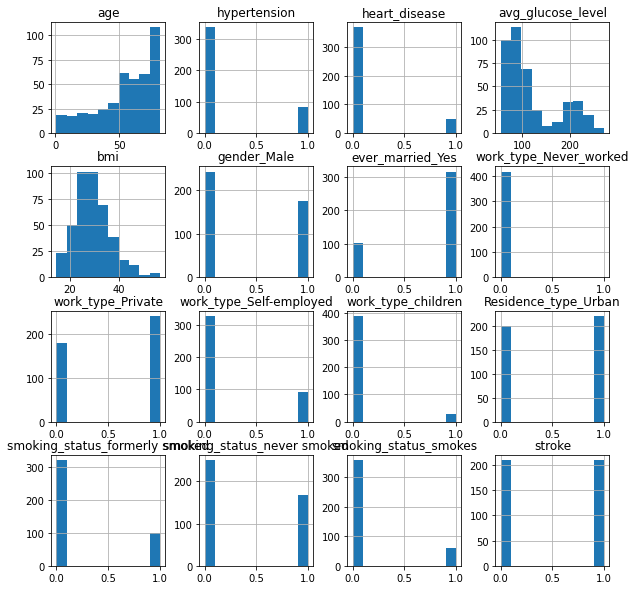

In [25]:
df.hist(bins=10,figsize=(10,10))
plt.show()

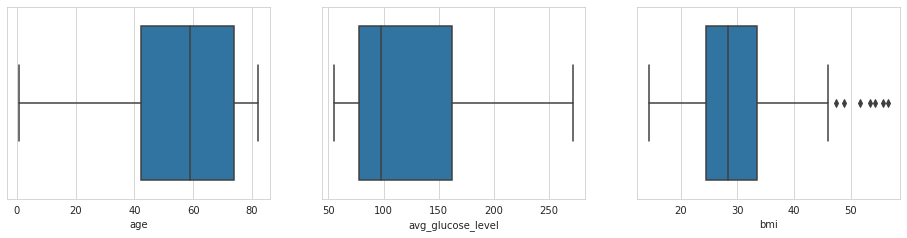

In [26]:
plt.figure(figsize=(16,12))
sns.set_style(style='whitegrid')
plt.subplot(3,3,1)
sns.boxplot(x='age',data=df)
plt.subplot(3,3,2)
sns.boxplot(x='avg_glucose_level',data=df)
plt.subplot(3,3,3)
sns.boxplot(x='bmi',data=df)

###Examining the correlations between the various attributes. The column of figures in the far right column show the correlations of each variable with the outcome ('stroke') label.

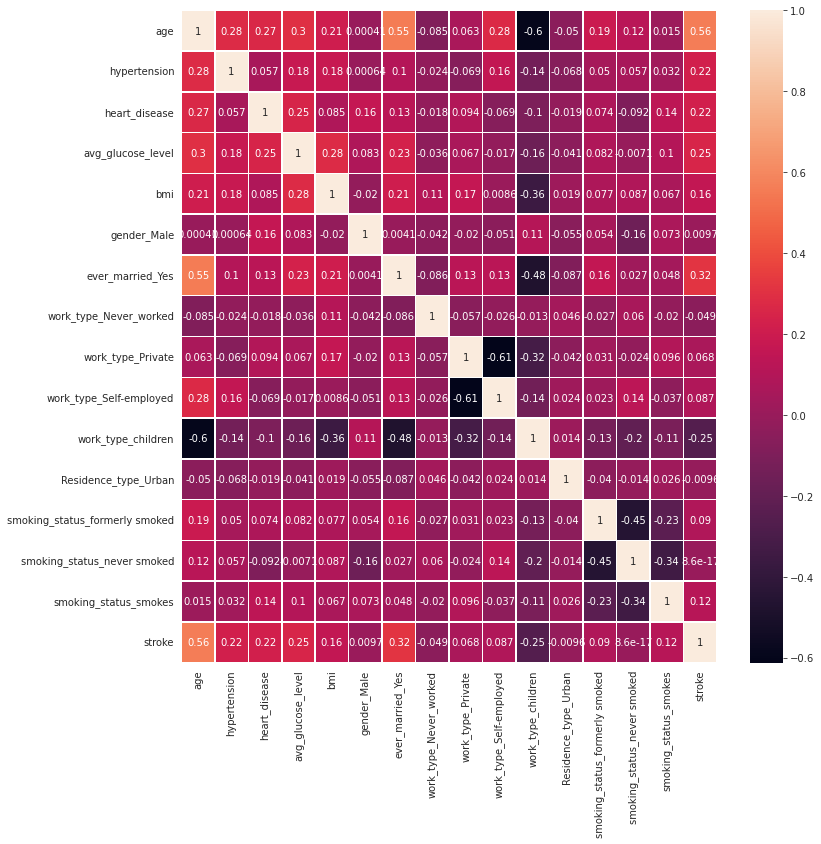

In [27]:
corrmat=df.corr()
fig, ax = plt.subplots(figsize=(12,12))         # Sample figsize in inches
sns.heatmap(corrmat, annot=True, linewidths= .5, ax=ax)

###Dividing our data into X and y

In [28]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [29]:
X

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,1,0,1,0,0,1,1,0,0
2,80.0,0,1,105.92,32.5,1,1,0,1,0,0,0,0,1,0
3,49.0,0,0,171.23,34.4,0,1,0,1,0,0,1,0,0,1
4,79.0,1,0,174.12,24.0,0,1,0,0,1,0,0,0,1,0
5,81.0,0,0,186.21,29.0,1,1,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4951,23.0,0,0,132.88,24.9,0,0,0,1,0,0,1,0,1,0
4973,65.0,0,0,81.06,30.1,1,1,0,1,0,0,1,0,0,1
4996,40.0,0,0,93.97,23.6,0,1,0,1,0,0,1,0,1,0
4999,18.0,0,0,83.37,24.4,1,0,0,1,0,0,0,0,0,0


In [30]:
y

0       1
2       1
3       1
4       1
5       1
       ..
4951    0
4973    0
4996    0
4999    0
5028    0
Name: stroke, Length: 418, dtype: int64

###Splitting our dataset into training and test data.

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)

###Importing our classification models and evaluation methods

In [32]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score


###1) Logistic Regression

In [33]:
logmodel = LogisticRegression(solver='liblinear', random_state=100)

In [34]:
logmodel.fit(X_train, y_train)

LogisticRegression(random_state=100, solver='liblinear')

In [35]:
y_pred = logmodel.predict(X_test)

In [36]:
y_pred

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1])

###Providing an accuracy score measuring how accurately the predicted labels match the actual labels 

In [37]:
accuracy_score(y_test, y_pred)

0.8

###Additional evaluation methods. The confusion matrix quadrants (moving clockwise beginning from the upper left) reflect the number of True Positives, False Positives, True Negatives, and False Negatives

Classification Report is:
               precision    recall  f1-score   support

           0       0.86      0.71      0.78        52
           1       0.76      0.89      0.82        53

    accuracy                           0.80       105
   macro avg       0.81      0.80      0.80       105
weighted avg       0.81      0.80      0.80       105


 F1:
 0.8173913043478261

 Precision score is:
 0.7580645161290323

 Recall score is:
 0.8867924528301887

 Confusion Matrix:



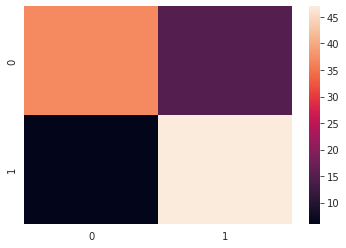

In [38]:
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("\n F1:\n",f1_score(y_test,y_pred))
print("\n Precision score is:\n",precision_score(y_test,y_pred))
print("\n Recall score is:\n",recall_score(y_test,y_pred))
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,y_pred))

###2) Logistic Regression with Elastic Net

In [39]:
elnet_model = LogisticRegressionCV(cv=20, penalty='elasticnet', l1_ratios=[0.1, 0.5, 0.9], solver='saga')

In [40]:
elnet_model.fit(X_train, y_train)

LogisticRegressionCV(cv=20, l1_ratios=[0.1, 0.5, 0.9], penalty='elasticnet',
                     solver='saga')

In [41]:
y_pred = elnet_model.predict(X_test)

In [42]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1])

###Providing an accuracy score measuring how accurately the predicted labels match the actual labels 

In [43]:
accuracy_score(y_test, y_pred)

0.7238095238095238

###Additional evaluation methods

Classification Report is:
               precision    recall  f1-score   support

           0       0.79      0.60      0.68        52
           1       0.68      0.85      0.76        53

    accuracy                           0.72       105
   macro avg       0.74      0.72      0.72       105
weighted avg       0.74      0.72      0.72       105


 F1:
 0.7563025210084033

 Precision score is:
 0.6818181818181818

 Recall score is:
 0.8490566037735849

 Confusion Matrix:



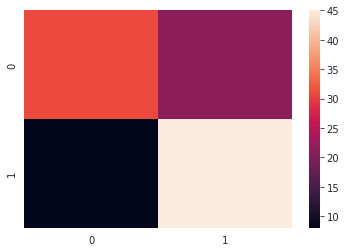

In [44]:
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("\n F1:\n",f1_score(y_test,y_pred))
print("\n Precision score is:\n",precision_score(y_test,y_pred))
print("\n Recall score is:\n",recall_score(y_test,y_pred))
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,y_pred))

###Implementing Principal Component Analysis (PCA) to reduce the dimensionality of the dataset. 

In [45]:
from sklearn.decomposition import PCA

In [46]:
pca = PCA(n_components=5)
X_new = pca.fit_transform(X)

In [47]:
X_new.shape

(418, 5)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, random_state=100)

###Implementing Logistic Regression with Elastic Net on the newly transformed data.

In [49]:
elnet_model.fit(X_train, y_train)

LogisticRegressionCV(cv=20, l1_ratios=[0.1, 0.5, 0.9], penalty='elasticnet',
                     solver='saga')

In [50]:
y_pred = elnet_model.predict(X_test)

In [51]:
y_pred

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0])

###Providing an accuracy score measuring how accurately the predicted labels match the actual labels 

In [52]:
accuracy_score(y_test, y_pred)

0.7333333333333333

###Additional evaluation methods

Classification Report is:
               precision    recall  f1-score   support

           0       0.74      0.65      0.70        49
           1       0.73      0.80      0.76        56

    accuracy                           0.73       105
   macro avg       0.73      0.73      0.73       105
weighted avg       0.73      0.73      0.73       105


 F1:
 0.7627118644067797

 Precision score is:
 0.7258064516129032

 Recall score is:
 0.8035714285714286

 Confusion Matrix:



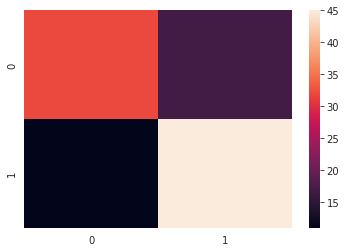

In [53]:
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("\n F1:\n",f1_score(y_test,y_pred))
print("\n Precision score is:\n",precision_score(y_test,y_pred))
print("\n Recall score is:\n",recall_score(y_test,y_pred))
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,y_pred))

###Logistic Regression was the most accurate (accuracy score of 0.8), followed by Logistic Regression with Elastic Net using PCA (accuracy score of 0.73). Last was Logistic Regression with Elastic Net alone (accuracy score of 0.71)